## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

## Loading Datasets
Here I have loaded the given 'train.csv' dataset using the pandas library.

In [2]:
df = pd.read_csv('data/train.csv')

## Data Query

#### Printing the dataset

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


#### Printing the shape of the dataset to know how many rows and columns we have:

In [4]:
df.shape

(100000, 12)

#### Printing more info to know how many non zero elements present in a column and what the data types are:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Here we can see there are total 11 columns from which there are 7 numerical columns and 4 object columns. We also have observed that there is no need for data convertion in this dataset.

#### Printing statistical info of the numerical columns of the dataset:

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,100000.0,49999.500000,28867.657797,0.00,24999.75,49999.50,74999.25,99999.00
Survived,100000.0,0.427740,0.494753,0.00,0.00,0.00,1.00,1.00
Pclass,100000.0,2.106910,0.837727,1.00,1.00,2.00,3.00,3.00
Age,96708.0,38.355472,18.313556,0.08,25.00,39.00,53.00,87.00
SibSp,100000.0,0.397690,0.862566,0.00,0.00,0.00,1.00,8.00
Parch,100000.0,0.454560,0.950076,0.00,0.00,0.00,1.00,9.00
Fare,99866.0,43.929330,69.588820,0.68,10.04,24.46,33.50,744.66


#### Know about the columns 

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### From the column names and the source of the dataset we came to know that:

> 'PassengerId' indicates numerical ID's of the passengers.

> 'Survived' indicates the passenger survived or not.

> 'Pclass' indicates the Ticket class.

> 'Name', 'Sex', 'Age' indicates the name, sex and age of the passenger.

> 'sibsp' and 'Parch' indicates the number of siblings and number of parents/children  aboard the titanic with the passenger.

> 'Ticket' indicates the ticket number of the passenger.

> 'Fare' indicates the fare of the ticket of the passenger.

> 'Cabin' indicates the cabin in which the passenger travelled.

> 'Embarked' indicates from where the passenger got into the ship. <br>

### Dealing with missing values
Any missing value in any column is harmful for our prediction process. So we have to deal with them.

In [8]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [9]:
missing_percentages = (df.isnull().sum() / df.shape[0]) * 100
missing_percentages

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

In [10]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells)*100
print("The percentage of total missing data is :", percent_missing, "%")

The percentage of total missing data is : 6.347083333333334 %


So we have came to know that the total missing percentage is  approximately 6.34% where the column named 'Age', 'Ticket', 'Fare', 'Cabin' and 'Embarked' have missing values in them. 
We can also observe it by visualization :

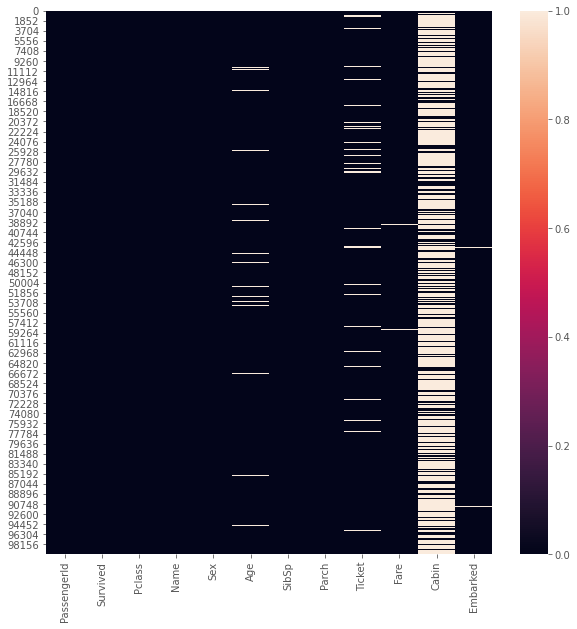

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

Now we will deal with the missing value columns one by one.

### Age column

In [12]:
df['Age'].isnull().sum()

3292

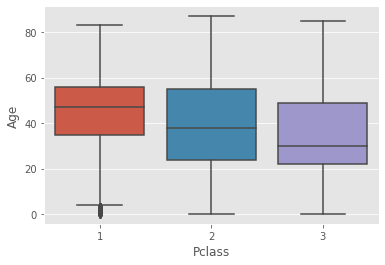

In [13]:
sns.boxplot(x='Pclass',y='Age',data=df);

From the above plot we can see that for three passenger classes the median age lies between 30 to 50. So we can replace the missing age values with the median values according to their passenger class.

In [14]:
medians = df.groupby(['Pclass'])['Age'].median()
medians

Pclass
1    47.0
2    38.0
3    30.0
Name: Age, dtype: float64

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 47

        elif Pclass == 2:
            return 38

        else:
            return 30

    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
df['Age'].isnull().sum()

0

Now there is no missing values in the 'Age' column

### Fare column

In [18]:
df['Fare'].isnull().sum()

134

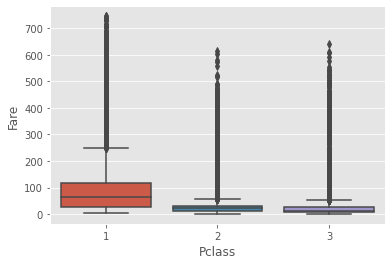

In [19]:
sns.boxplot(x='Pclass',y='Fare',data=df);

From the above plot we can see that for three passenger classes the median fare lies between 5 to 80. So we can replace the missing fare values with the median values according to their passenger class.

In [20]:
medians = df.groupby(['Pclass'])['Fare'].median()
medians

Pclass
1    63.58
2    22.72
3    10.96
Name: Fare, dtype: float64

In [21]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 63.58

        elif Pclass == 2:
            return 22.72

        else:
            return 10.96

    else:
        return Fare

In [22]:
df['Fare'] = df[['Fare','Pclass']].apply(impute_fare,axis=1)

In [23]:
df['Fare'].isnull().sum()

0

Now there is no missing values in the 'Fare' column.

### Embarked column

In [24]:
df['Embarked'].isnull().sum()

250

In [25]:
df['Embarked'].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

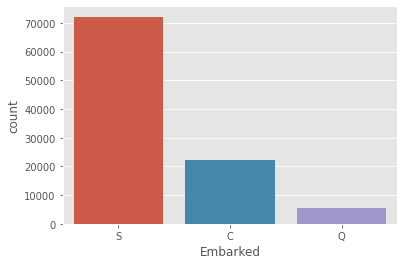

In [26]:
plot = sns.countplot(df["Embarked"]);

From the above value counts and the count plot we can see that the value "S" of the embarked column has way more higher values than the rest of the values so we can replace the missing values with "S".

In [27]:
df["Embarked"].fillna("S", inplace = True)

In [28]:
df["Embarked"].isnull().sum()

0

Now there is no missing values in the 'Embarked' column.

#### Let's look into other columns too:

In [29]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket          4623
Fare               0
Cabin          67866
Embarked           0
dtype: int64

Here the "Ticket" and "Cabin" column has missing values too.

### Dropping unuseful columns

Here the "PassengerID" "Name" and "Ticket" column does not have a good impact on the output column so we can drop these columns. We can also drop the "Cabin" column as there are so many missing values in that column.

But we will not drop the "PassengerID" column until the end because it is a unique identification column which can help us to identify the characteristics of a certain passenger.

In [30]:
df.drop(['Ticket', 'Name', 'Cabin'], axis =1, inplace = True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,47.00,2,0,27.14,S
1,1,0,3,male,30.00,0,0,13.35,S
2,2,0,3,male,0.33,1,2,71.29,S
3,3,0,3,male,19.00,0,0,13.04,S
4,4,1,3,male,25.00,0,0,7.76,S


### Handling Outliers
An outlier is an observation that lies an abnormal distance from other values in a column which can affect our prediction accuracy so we need to remove them

Lets make a copy of our dataset before doing outlier analysis. So if anything unwanted happens it will not affect our main dataset.

In [32]:
df2 = df.copy()

In [33]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,47.00,2,0,27.14,S
1,1,0,3,male,30.00,0,0,13.35,S
2,2,0,3,male,0.33,1,2,71.29,S
3,3,0,3,male,19.00,0,0,13.04,S
4,4,1,3,male,25.00,0,0,7.76,S


### Univariate Analysis
Analyze data over a single column from the dataset

#### Passenger Class column

In [34]:
df2['Pclass'].value_counts(normalize=True)*100

3    41.006
1    30.315
2    28.679
Name: Pclass, dtype: float64

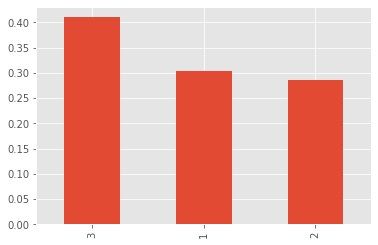

In [35]:
df2['Pclass'].value_counts(normalize=True).plot.bar()
plt.show()

From the above count and plot we can say that 3rd class has the highest percentage of passengers and rest of the class has quite similar percentage of passenger but there are no outliers found.

#### Sex Column

In [36]:
df2['Sex'].value_counts(normalize=True)*100

male      56.114
female    43.886
Name: Sex, dtype: float64

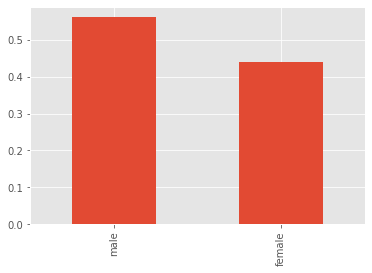

In [37]:
df2['Sex'].value_counts(normalize=True).plot.bar()
plt.show()

From the above count and plot we can say that there are more male passengers than female. But there are no outliers here.

##### SibSp column

In [38]:
df2['SibSp'].value_counts(normalize = True)*100

0    73.308
1    19.758
2     3.703
3     1.635
4     1.168
8     0.296
5     0.132
Name: SibSp, dtype: float64

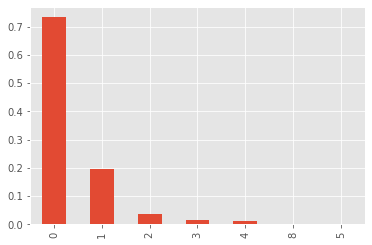

In [39]:
df2['SibSp'].value_counts(normalize = True).plot.bar()
plt.show()

In [40]:
SibSp_out = df2['SibSp'] <= 5

In [41]:
np.size(SibSp_out) - np.count_nonzero(SibSp_out)

296

In [42]:
df2 = df2[SibSp_out]

Here we have analyzied that less than 0.5 percent of the passenger has five or more siblings with them so we have marked them as an outlier and removed them.

##### Parch column

In [43]:
df2['Parch'].value_counts(normalize=True)*100

0    73.663043
1    12.900185
2    11.212188
3     0.982909
4     0.447324
5     0.327971
9     0.262778
6     0.203603
Name: Parch, dtype: float64

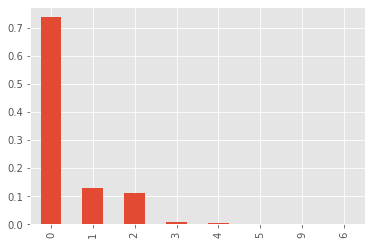

In [44]:
df2['Parch'].value_counts(normalize=True).plot.bar()
plt.show()

In [45]:
Parch_out = df2['Parch'] <= 4

In [46]:
np.size(Parch_out) - np.count_nonzero(Parch_out)

792

In [47]:
df2 = df2[Parch_out]

Here we have analyzied that less than 0.5 percent of the passenger has four or more parents/children with them so we have marked them as an outlier and removed them.

#### Embarked column

In [48]:
df2['Embarked'].value_counts(normalize=True)*100

S    72.410830
C    22.176278
Q     5.412892
Name: Embarked, dtype: float64

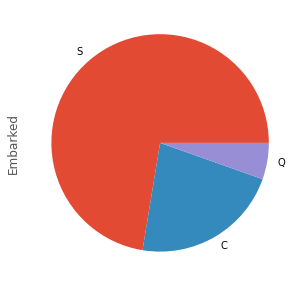

In [49]:
pie_data = df2['Embarked'].value_counts()
plot = pie_data.plot(kind='pie',
                     subplots=True,
                     figsize=(5,5))

From above plot and counting we can say most of the people got into the ship from the "S" point then the "C" point and then the "Q" point. We can see no outliers here.

### Age column

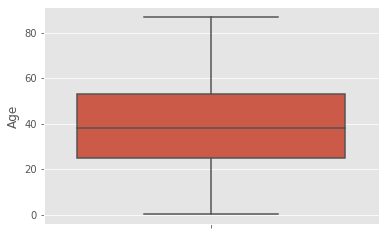

In [50]:
plot = sns.boxplot(y=df2["Age"])

From the above box plot we can see there are no outliers in the age column

#### Fare column

In [51]:
df3 = df2.copy()

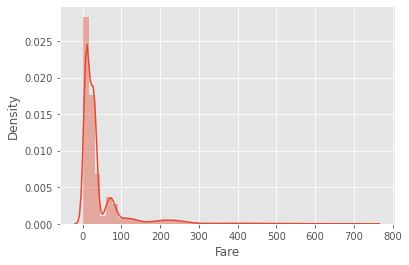

In [52]:
sns.distplot(df3.Fare, axlabel='Fare');

In [53]:
df3["Fare"].kurtosis()

19.59720032654365

In [54]:
df3["Fare"].skew()

3.919033590795179

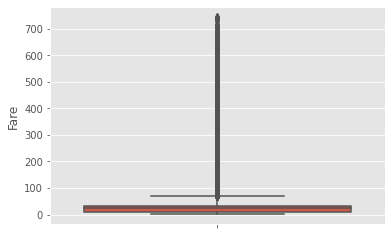

In [55]:
plot = sns.boxplot(y = df3['Fare'])

In [56]:
Fare_out = df3['Fare'] <= 55

In [57]:
np.size(Fare_out) - np.count_nonzero(Fare_out)

20736

As we can see the amount of outliers in the 'Fare' column is very high and if we remove all of them it may harm our predictions. So we have to deal with it in another way.

### Bivariate Analysis
Analyze two variable columns from the dataset

Lets Compare the 'Pclass' and 'Fare' column:

In [58]:
df4 = df3.copy()

In [59]:
df4.shape

(98912, 9)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

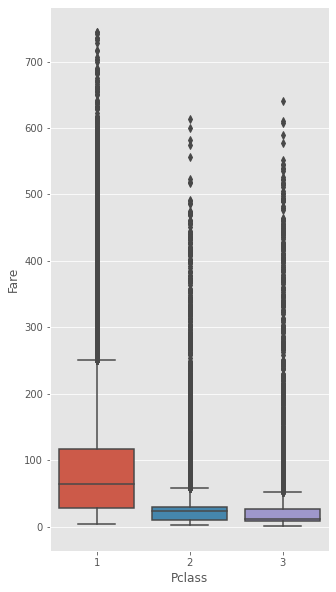

In [60]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("Pclass", "Fare", data=df4, ax=ax)

In [61]:
medians = df4.groupby(['Pclass'])['Fare'].median()
medians

Pclass
1    63.58
2    22.65
3    10.94
Name: Fare, dtype: float64

As we can see a relationship between these two columns.
Now we will replace the outliers of 'Fare' column according to their "Pclass" column. 

In [62]:
df4 = df3.copy()

In [63]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]

    if Pclass == 1:
        if Fare > 117:
            return 63.58
    if Pclass == 2:
        if Fare > 54:
            return 22.65
    if Pclass == 3:
        if Fare > 39:
            return 10.94
        else:
            return Fare
    else:
        return Fare

In [64]:
df4['Fare'] = df4[['Fare','Pclass']].apply(impute_fare,axis=1)

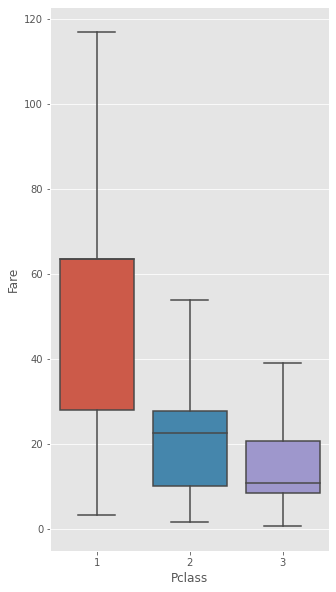

In [65]:
fig_dims = (5, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot("Pclass", "Fare", data=df4, ax=ax);

In [66]:
df4[["Pclass", 'Fare']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pclass,98912.0,2.106286,0.838241,1.00,1.00,2.00,3.00,3.0
Fare,98912.0,26.814545,22.555964,0.68,10.02,22.65,31.14,117.0


This is how we have handled the outliers in the 'Fare' column.

##### Passenger Class VS Sex:

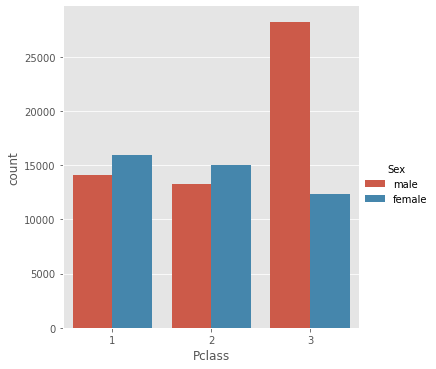

In [67]:
sns.factorplot('Pclass',data=df4,hue='Sex',kind='count');

From above plot we can see most people are from the 3rd class and the count ratio is higher for male passengers than female.

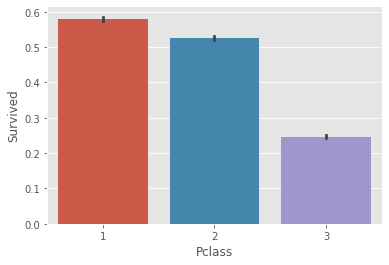

In [68]:
sns.barplot(x='Pclass', y='Survived', data=df4);

From above plot we can see that the survival ratio for 1st and 2nd class are almost same but it's lowest for the 3rd class passengers.

##### Passenger Sex vs Survival Rate:

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

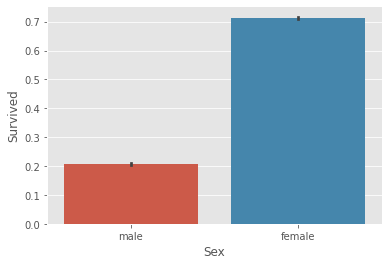

In [69]:
sns.barplot(x='Sex', y='Survived', data=df4)

From above plot we can see that the survival rate of female passengers are much higher than the male passengers.

### Multivariate Analysis
Analyze more than two variable columns from the dataset

In [70]:
df5 = df4.copy()

In [71]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,47.00,2,0,27.14,S
1,1,0,3,male,30.00,0,0,13.35,S
2,2,0,3,male,0.33,1,2,10.94,S
3,3,0,3,male,19.00,0,0,13.04,S
4,4,1,3,male,25.00,0,0,7.76,S


In [72]:
result = pd.pivot_table(data=df5, index='Embarked', columns='Sex',values='Survived')
print(result)

Sex         female      male
Embarked                    
C         0.848063  0.516790
Q         0.699395  0.348553
S         0.626531  0.159924


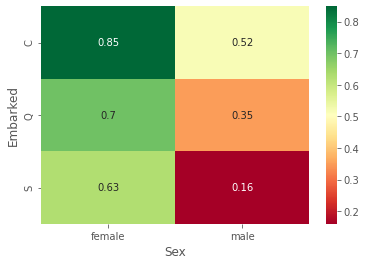

In [73]:
sns.heatmap(result, cmap ='RdYlGn', annot=True)
plt.show()

From the above pivot table and heatman we can see the female passengers who aboard the ship from the "C" point has the most chances of survival where the male passengers who aboard the ship from the "S" point has the least chances of survival.

### Correlation Matrix:

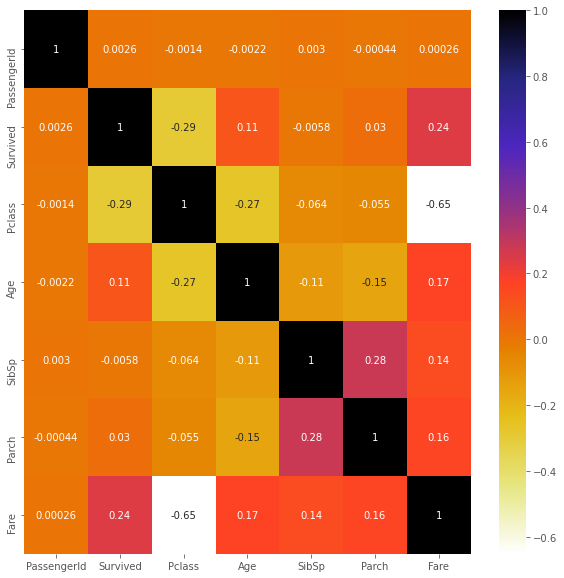

In [74]:
plt.figure(figsize = (10,10))
corr = df5.corr(method='pearson')
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

From this correlation matrix heatmap , we can say that there is no significant correlation between the features.

### Handling Categorical Variables
As out machine learning model only understands numerical values so we need to convert out categorical valiables into numerical ones. 

In [75]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,male,47.00,2,0,27.14,S
1,1,0,3,male,30.00,0,0,13.35,S
2,2,0,3,male,0.33,1,2,10.94,S
3,3,0,3,male,19.00,0,0,13.04,S
4,4,1,3,male,25.00,0,0,7.76,S


In [76]:
df5.shape

(98912, 9)

In [77]:
df_sex = pd.get_dummies(df5['Sex'])

In [78]:
df5['Embarked'] = df['Embarked'].replace(['S','C','Q'],[3,2,1])

In [80]:
df5 = pd.concat([df5, df_sex], axis = 1)

In [81]:
df5.drop(['PassengerId','Sex'], axis =1, inplace = True)

In [82]:
df5.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,1,47.00,2,0,27.14,3,0,1
1,0,3,30.00,0,0,13.35,3,0,1
2,0,3,0.33,1,2,10.94,3,0,1
3,0,3,19.00,0,0,13.04,3,0,1
4,1,3,25.00,0,0,7.76,3,0,1
5,0,2,35.00,0,0,6.71,3,0,1
6,0,3,7.00,0,0,9.77,3,0,1
7,1,3,6.00,1,2,31.50,3,1,0
8,0,1,27.00,2,1,73.02,3,0,1
9,0,2,66.00,0,0,9.14,2,0,1


#### Saving the imbalanced data:

In [83]:
df5.to_csv('data/result_imbalanced.csv', index = False)

### Handling Imbalanced Data
In this section we will handle the imbalancement of our target variable

In [84]:
df6 = df5.copy()

In [85]:
df6['Survived'].value_counts()

0    56597
1    42315
Name: Survived, dtype: int64

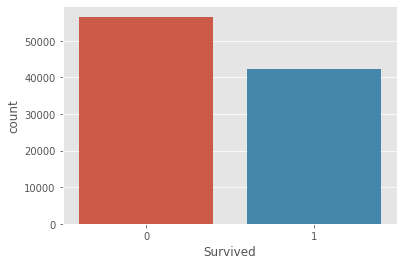

In [87]:
sns.countplot(x='Survived', data = df6);

From the above count and plot we can see that there is imbalancement between dead and alive section of the survived column which can affect out prediction. So we can do random downsampling to the dead count and make the data balanced.

##### Random under-sampling:

In [88]:
df_alive = df6[df6['Survived']== 1]
df_dead = df6[df6['Survived']== 0]

In [89]:
print(df_alive.shape)
print(df_dead.shape)

(42315, 9)
(56597, 9)


In [90]:
downsampled_dead = df_dead.sample(42315)

In [91]:
print(downsampled_dead.shape)

(42315, 9)


In [94]:
df7 = downsampled_dead.append(df_alive)
print(df8.shape)

(84630, 9)


In [95]:
df7['Survived'].value_counts()

0    42315
1    42315
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

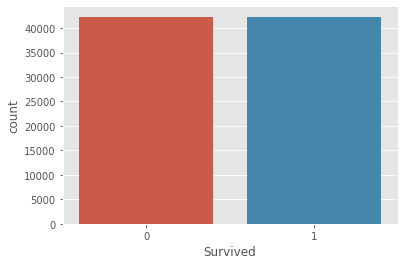

In [96]:
sns.countplot(x='Survived', data = df8)

Now the data is perfectly balanced.

## Saving the dataset for modeling. 
Here we have analyzed our dataset now we will save it to deploy into our ML model. 
After analyzing various parameters of the model we can always come back to this section and analize our data accordingly.

In [98]:
df7.to_csv('data/result_balanced.csv', index = False)